In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
request_df_2 = pd.read_csv("//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/filtered_cash")
fees_df_2 = pd.read_csv("//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/filtered_fees")

In [18]:
#Hay que hacerlo otra vez porque esto por los vistos no se guarda...

#Crear una copia de mi DF de pagos y transformar todas las columnas a fechas (las que son fechas)
request_df_2 = request_df_2.copy()

request_df_2['created_at'] = pd.to_datetime(request_df_2['created_at'])
request_df_2['updated_at'] = pd.to_datetime(request_df_2['updated_at'])
request_df_2['moderated_at'] = pd.to_datetime(request_df_2['moderated_at'], errors="coerce")
request_df_2['reimbursement_date'] = pd.to_datetime(request_df_2['reimbursement_date'], errors="coerce")
request_df_2['cash_request_received_date'] = pd.to_datetime(request_df_2['cash_request_received_date'], errors="coerce")
request_df_2['money_back_date'] = pd.to_datetime(request_df_2['money_back_date'], errors="coerce")
request_df_2['send_at'] = pd.to_datetime(request_df_2['send_at'], errors="coerce")
request_df_2['send_at'] = pd.to_datetime(request_df_2['send_at'], errors="coerce")
request_df_2['reco_creation'] = pd.to_datetime(request_df_2['reco_creation'], errors="coerce")
request_df_2['reco_last_update'] = pd.to_datetime(request_df_2['reco_last_update'], errors="coerce")

#Rellenar los NaNs de user ID con los valores de "Deleted Account ID"
request_df_2['user_id'] = request_df_2['user_id'].fillna(request_df_2["deleted_account_id"])

#Convertir los ID a Integers
request_df_2['user_id'] = request_df_2["user_id"].astype("int")

In [19]:
request_df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     23970 non-null  int64              
 6   moderated_at                15912 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             12040 non-null  datetime64[ns,

In [20]:
#Crear los Cohortes por mes, meterla en la columna "Cohort De Verdad"
request_df_2["cohort_de_verdad"] = request_df_2.groupby("user_id")["created_at"].transform("min").dt.to_period("M")

request_df_2

/tmp/ipykernel_1022/3966957515.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  request_df_2["cohort_de_verdad"] = request_df_2.groupby("user_id")["created_at"].transform("min").dt.to_period("M")


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_de_verdad
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231,2019-12-11 14:24:22.897988+00:00,NaN,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761,2019-12-18 14:26:18.128407+00:00,NaN,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686,2020-05-07 09:21:55.320193+00:00,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681,NaT,NaN,NaT,2020-10-13,2021-02-06 20:17:49.257521+00:00,instant,2020-10-12 13:54:24.352856+00:00,NaN,NaT,NaT,2020-06
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00:00,30367,NaT,30367.0,NaT,2020-10-28,2020-12-01 13:26:53.787672+00:00,instant,2020-10-27 14:41:57.901946+00:00,completed,2020-11-12 23:20:41.928788+00:00,2020-12-01 13:26:53.815504+00:00,2020-10
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00:00,82122,NaT,NaN,NaT,2020-10-21,2021-02-05 12:19:30.626289+00:00,instant,2020-10-20 07:58:14.171553+00:00,NaN,NaT,NaT,2020-10
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00:00,64517,NaT,NaN,NaT,2020-10-12,2021-02-05 13:14:19.689906+00:00,instant,2020-10-10 05:41:23.368363+00:00,NaN,NaT,NaT,2020-10


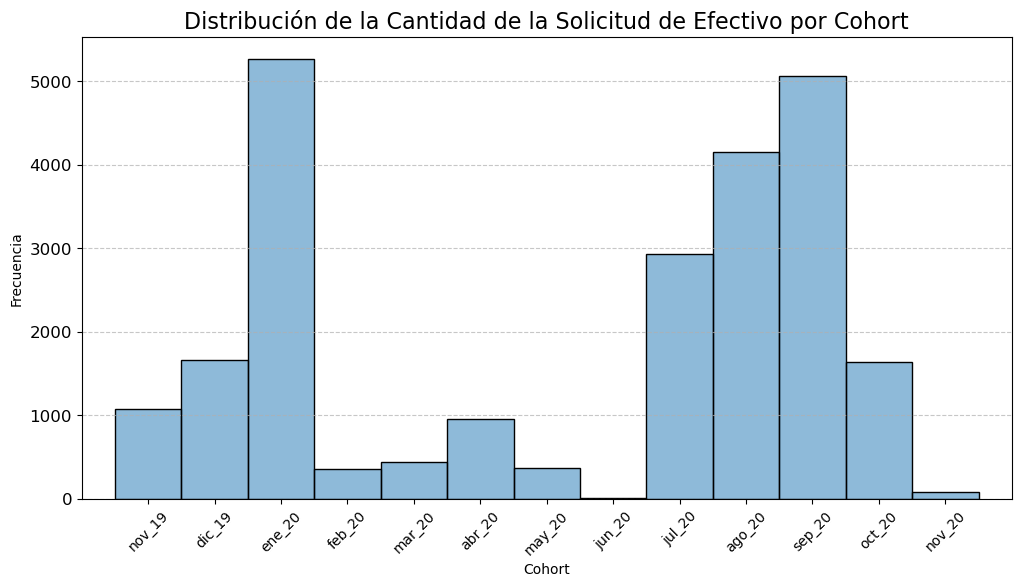

<Figure size 800x400 with 0 Axes>

In [21]:
# Histogramas

meses_espanol = [

    "nov_19",

    "dic_19",

    "ene_20",

    "feb_20",

    "mar_20",

    "abr_20",

    "may_20",

    "jun_20",

    "jul_20",

    "ago_20",

    "sep_20",

    "oct_20",

    "nov_20"
]

plt.figure(figsize=(12, 6))

request_df_2['cohort_de_verdad'] = request_df_2['cohort_de_verdad'].astype(str)

sns.histplot(request_df_2['cohort_de_verdad'], alpha=0.5)

plt.title('Distribución de la Cantidad de la Solicitud de Efectivo por Cohort', fontsize=16)

plt.xlabel('Cohort')

plt.ylabel('Frecuencia')

plt.yticks(fontsize=12)

plt.xticks(ticks=range(13), labels=meses_espanol, rotation=45)

plt.xlim(-1, 13)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.figure(figsize=(8,4), tight_layout=True)


plt.show()

In [22]:
transfer_counts = request_df_2.groupby(["cohort_de_verdad", "transfer_type"]).size().unstack(fill_value=0)

transfer_counts

transfer_type,instant,regular
cohort_de_verdad,,
2019-11,4,4
2019-12,170,910
2020-01,60,294
2020-02,84,357
2020-03,80,291
2020-04,207,745
2020-05,496,1164
2020-06,1924,3342
2020-07,2016,2131


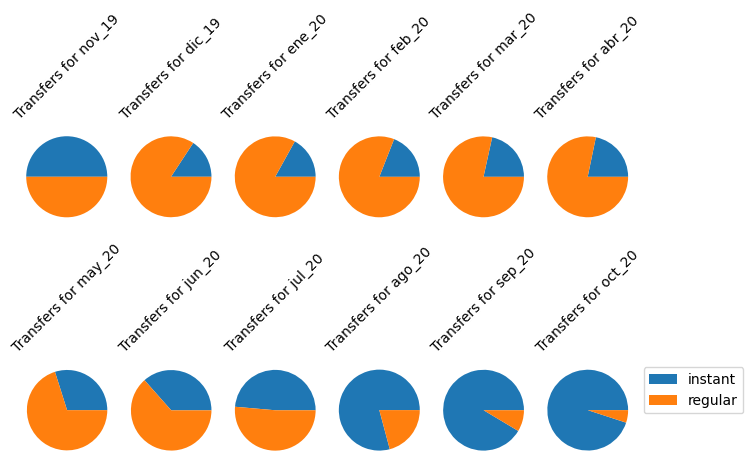

In [23]:
#Crear un Pie Chart que dice la proporcion de cash instantaneo VS regular para cada uno de los cohortes

fig, axs = plt.subplots(nrows=2, ncols=6)

# Iterate over each row in transfer_counts DataFrame
for i, (idx, row) in enumerate(transfer_counts.iterrows()):
    if i<=5:
        # Plot a pie chart as a subplot for each row
        axs[0,i].pie(row)

        # Equal aspect ratio ensures that pie is drawn as a circle.
        axs[0,i].axis('equal') 

        # Add a title with the month_cohort value
        axs[0,i].set_title(f"Transfers for {meses_espanol[i]}", size=10, rotation = 45)

    if i>5 and i<12:
        j=i-6
        axs[1,j].pie(row)

        axs[1,j].axis('equal') 
        
        axs[1,j].set_title(f"Transfers for {meses_espanol[i]}", size=10, rotation = 45)


    

# Adjust layout to prevent overlapping
plt.tight_layout()

#plt.legend(["instant", "regular"],  loc='best')
plt.legend(["instant", "regular"], bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the pie chart
plt.show()

<AxesSubplot:xlabel='cohort_de_verdad'>

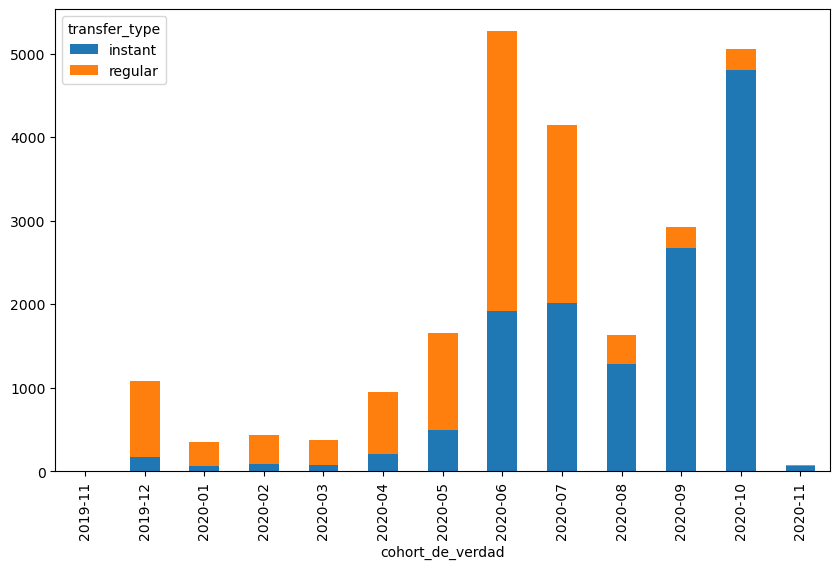

In [24]:
#Barchart indicando cuales de los cohortes han solicitado instant y regular transfer types
transfer_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

In [25]:
#Crear una DataFrame nueva, agrupada por Month Cohort Y Cash Request data. Cada una de las agrupaciones tendra la cuenta de las veces que aparecen.
request_df_3 = request_df_2.groupby(["cohort_de_verdad", "cash_request_received_date"]).count()
request_df_3

id  amount  status  created_at  \
cohort_de_verdad cash_request_received_date                                   
2019-11          2020-04-17                   1       1       1           1   
                 2020-05-18                   1       1       1           1   
                 2020-08-05                   1       1       1           1   
                 2020-09-23                   1       1       1           1   
                 2020-10-15                   1       1       1           1   
...                                          ..     ...     ...         ...   
2020-11          2020-11-02                  17      17      17          17   
                 2020-11-03                  35      35      35          35   
                 2020-11-04                   2       2       2           2   
                 2020-11-09                   4       4       4           4   
                 2020-11-11                   1       1       1           1   

                                             updated_at  user_id  \
cohort_de_verdad cash_request_received_date                        
2019-11          2020-04-17                           1        1   
                 2020-05-18                           1        1   
                 2020-08-05                           1        1   
                 2020-09-23                           1        1   
                 2020-10-15                           1        1   
...                                                 ...      ...   
2020-11          2020-11-02                          17       17   
                 2020-11-03                          35       35   
                 2020-11-04                           2        2   
                 2020-11-09                           4        4   
                 2020-11-11                           1        1   

                                             moderated_at  deleted_account_id  \
cohort_de_verdad cash_request_received_date                                     
2019-11          2020-04-17                             1                   0   
                 2020-05-18                             0                   0   
                 2020-08-05                             0                   0   
                 2020-09-23                             1                   0   
                 2020-10-15                             0                   0   
...                                                   ...                 ...   
2020-11          2020-11-02                             0                   0   
                 2020-11-03                             0                   0   
                 2020-11-04                             0                   0   
                 2020-11-09                             0                   0   
                 2020-11-11                             0                   0   

                                             reimbursement_date  \
cohort_de_verdad cash_request_received_date                       
2019-11          2020-04-17                                   1   
                 2020-05-18                                   0   
                 2020-08-05                                   0   
                 2020-09-23                                   1   
                 2020-10-15                                   0   
...                                                         ...   
2020-11          2020-11-02                                   4   
                 2020-11-03                                  10   
                 2020-11-04                                   1   
                 2020-11-09                                   3   
                 2020-11-11                                   1   

                                             money_back_date  transfer_type  \
cohort_de_verdad cash_request_received_date                                   
2019-11          2020-04-17                     

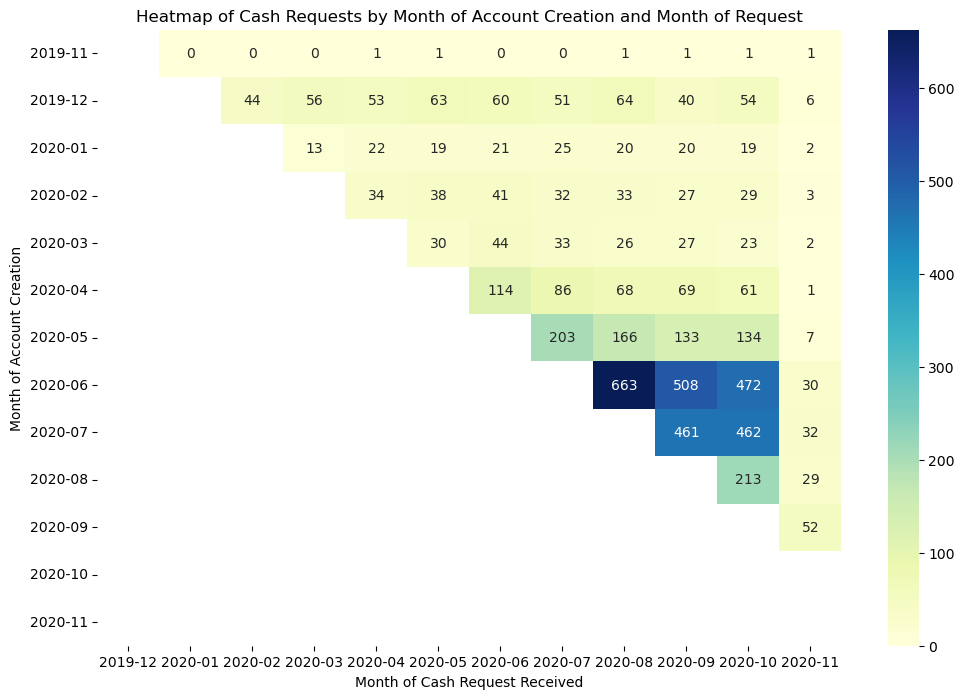

In [26]:
#Crear un heat map de cuantos Cash Requests hubo en cada mes, por cada uno de los cohortes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Aqui convertimos la columna de "cash_request_received_date" a meses en vez de dias
request_df_2["cash_request_received_date"] = request_df_2["cash_request_received_date"].dt.to_period("M")

# Group by month_cohort and cash_request_received_month and count the occurrences
heatmap_data = request_df_2.groupby(['cohort_de_verdad', 'cash_request_received_date']).size().unstack(fill_value=0)

mask = np.tril(np.ones_like(heatmap_data, dtype=bool))


# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", mask=mask)
plt.title('Heatmap of Cash Requests by Month of Account Creation and Month of Request')
plt.xlabel('Month of Cash Request Received')
plt.ylabel('Month of Account Creation')
plt.show()

In [27]:
#porque la discrepancia?
request_df_2[request_df_2["cohort_de_verdad"] == "2019-11"]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_de_verdad
32,118,100.0,rejected,2019-12-12 14:14:14.131479+00:00,2019-12-12 14:41:39.487777+00:00,47,2019-12-12 14:41:39.485394+00:00,NaN,2019-12-19 14:14:14.131025+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-11
445,1218,100.0,money_back,2020-04-16 08:42:15.429083+00:00,2020-05-08 21:35:33.860652+00:00,47,2020-04-16 09:15:24.585050+00:00,NaN,2020-04-30 08:42:16.007000+00:00,2020-04,2020-05-08 21:35:33.858794+00:00,regular,NaT,NaN,NaT,NaT,2019-11
1037,10942,10.0,money_back,2020-08-05 09:34:16.818322+00:00,2021-01-21 15:49:28.424845+00:00,47,NaT,NaN,NaT,2020-08,NaT,instant,NaT,NaN,NaT,NaT,2019-11
2644,1832,10.0,money_back,2020-05-15 16:04:10.449840+00:00,2020-08-04 18:19:04.558652+00:00,47,NaT,NaN,NaT,2020-05,2020-08-04 18:19:04.558434+00:00,regular,NaT,NaN,NaT,NaT,2019-11
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00:00,47,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-11
17049,17314,5.0,money_back,2020-09-22 16:03:24.612340+00:00,2020-12-18 13:11:08.673601+00:00,47,2020-09-22 16:08:52.709145+00:00,NaN,2020-10-16 16:03:24.557950+00:00,2020-09,2020-10-08 20:50:51.537153+00:00,instant,2020-10-06 16:03:24.557950+00:00,NaN,NaT,NaT,2019-11
19299,21042,5.0,money_back,2020-10-14 10:56:52.227355+00:00,2020-12-18 13:12:02.160123+00:00,47,NaT,NaN,NaT,2020-10,2020-10-28 08:04:45.768509+00:00,instant,2020-10-14 10:57:03.133635+00:00,NaN,NaT,NaT,2019-11
22010,26848,1.0,money_back,2020-10-31 22:14:03.780126+00:00,2020-12-18 13:13:14.156929+00:00,47,NaT,NaN,NaT,2020-11,2020-11-11 06:53:41.209383+00:00,instant,2020-10-31 22:14:23.998439+00:00,NaN,NaT,NaT,2019-11


/tmp/ipykernel_1022/3652378590.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data2 = request_df_2.groupby(['cohort_de_verdad', 'amount_bins']).size().unstack(fill_value=0)


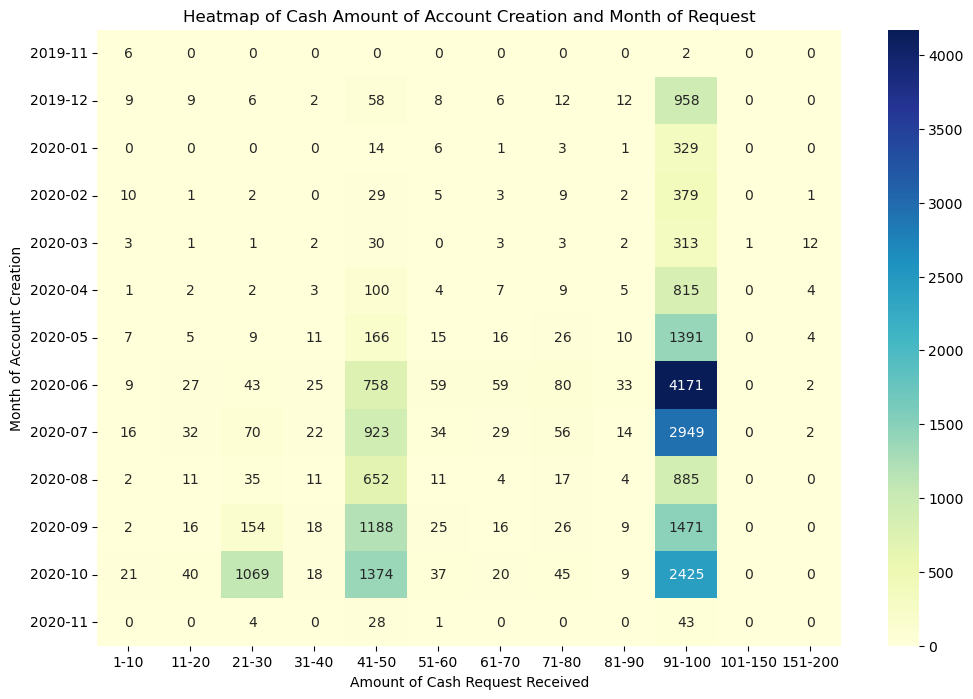

In [28]:
# Define custom bins

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]

# Define labels for the bins

labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-150', '151-200']

# Create a new column for the bin labels

request_df_2['amount_bins'] = pd.cut(request_df_2['amount'], bins=bins, labels=labels)

# Group by month_cohort and cash_request_received_month and count the occurrences

heatmap_data2 = request_df_2.groupby(['cohort_de_verdad', 'amount_bins']).size().unstack(fill_value=0)

# Plot heatmap

plt.figure(figsize=(12, 8))

sns.heatmap(heatmap_data2, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Cash Amount of Account Creation and Month of Request')

plt.xlabel('Amount of Cash Request Received')

plt.ylabel('Month of Account Creation')

plt.show()

In [29]:
#Juntar las dos tablas
result_df = fees_df_2.join(request_df_2.set_index('id'), on='cash_request_id', lsuffix='_left', rsuffix='_right')


In [30]:
result_df["category"].fillna("No incident", inplace=True)

/tmp/ipykernel_1022/2493841347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_df["category"].fillna("No incident", inplace=True)


In [31]:
#Agrupar las merged tables por categoria y cohort
result_df.groupby(["category", "cohort_de_verdad"]).count()

Unnamed: 0    id  cash_request_id  \
category               cohort_de_verdad                                      
No incident            2019-11                   10    10               10   
                       2019-12                  258   258              258   
                       2020-01                  116   116              116   
                       2020-02                  169   169              169   
                       2020-03                  142   142              142   
                       2020-04                  394   394              394   
                       2020-05                  952   952              952   
                       2020-06                 3723  3723             3723   
                       2020-07                 2859  2859             2859   
                       2020-08                 1270  1270             1270   
                       2020-09                 3025  3025             3025   
                       2020-10                 5876  5876             5876   
                       2020-11                   67    67               67   
month_delay_on_payment 2019-12                   19    19               19   
                       2020-01                    6     6                6   
                       2020-02                    9     9                9   
                       2020-03                   10    10               10   
                       2020-04                   49    49               49   
                       2020-05                   78    78               78   
                       2020-06                  234   234              234   
                       2020-07                  171   171              171   
                       2020-08                   21    21               21   
rejected_direct_debit  2019-12                   34    34               34   
                       2020-01                    9     9                9   
                       2020-02                   15    15               15   
                       2020-03                   22    22               22   
                       2020-04                   70    70               70   
                       2020-05                  156   156              156   
                       2020-06                  542   542              542   
                       2020-07                  405   405              405   
                       2020-08                  128   128              128   
                       2020-09                  195   195              195   
                       2020-10                   23    23               23   

                                         type  status_left  total_amount  \
category               cohort_de_verdad                                    
No incident            2019-11             10           10            10   
                       2019-12            258          258           258   
                       2020-01            116          116           116   
                       2020-02            169          169           169   
                       2020-03            142          142           142   
                       2020-04            394          394           394   
                       2020-05            952          952           952   
                       2020-06           3723         3723          3723   
                       2020-07           2859         2859          2859   
                       2020-08           1270         1270          1270   
                       2020-09           3025         3025          3025   
                       2020-10           5876         5876          5876   
                       2020-11             67           67            67   
month_delay_on_payment 2019-12             19           19            19   
                       2020-01              6            6             6   
                  

In [32]:
#Crear 3 subsets
subset_no_incident = result_df[result_df['category'] == "No incident"]
subset_no_incident.groupby(["cohort_de_verdad"]).count()

subset_rejected_month_delay = result_df[result_df['category'] == "month_delay_on_payment"]
subset_rejected_month_delay.groupby(["cohort_de_verdad"]).count()

subset_rejected_direct_debit = result_df[result_df['category'] == "rejected_direct_debit"]
subset_rejected_direct_debit.groupby(["cohort_de_verdad"]).count()


,Unnamed: 0,id,cash_request_id,type,status_left,category,total_amount,reason,created_at_left,updated_at_left,...,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,amount_bins
cohort_de_verdad,,,,,,,,,,,,,,,,,,,,,
2019-12,34,34,34,34,34,34,34,34,34,34,...,2,7,34,24,34,14,34,34,34,34
2020-01,9,9,9,9,9,9,9,9,9,9,...,0,1,9,6,9,2,9,9,9,9
2020-02,15,15,15,15,15,15,15,15,15,15,...,0,4,15,13,15,8,15,15,15,15
2020-03,22,22,22,22,22,22,22,22,22,22,...,3,4,22,16,22,10,22,22,22,22
2020-04,70,70,70,70,70,70,70,70,70,70,...,6,9,70,54,70,23,70,70,70,70
2020-05,156,156,156,156,156,156,156,156,156,156,...,18,26,156,127,156,48,156,156,156,156
2020-06,542,542,542,542,542,542,542,542,542,542,...,65,68,537,408,542,218,541,541,541,542
2020-07,405,405,405,405,405,405,405,405,405,405,...,26,51,403,276,405,259,405,405,405,405
2020-08,128,128,128,128,128,128,128,128,128,128,...,5,18,127,78,128,119,127,127,127,128


In [33]:
result_df.groupby("cohort_de_verdad").count()["id"]

cohort_de_verdad
2019-11      10
2019-12     311
2020-01     131
2020-02     193
2020-03     174
2020-04     513
2020-05    1186
2020-06    4499
2020-07    3435
2020-08    1419
2020-09    3220
2020-10    5899
2020-11      67
Name: id, dtype: int64

In [35]:
#Porcentage de rejected por direct debit por cohort
y1=subset_rejected_direct_debit.groupby(["cohort_de_verdad"]).count()["id"]/result_df.groupby("cohort_de_verdad").count()["id"]*100
#y1.reset_index()

In [36]:
y2=subset_rejected_month_delay.groupby(["cohort_de_verdad"]).count()["id"]/result_df.groupby("cohort_de_verdad").count()["id"]*100
#y2.reset_index()

In [37]:
y2.keys()


Index(['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
       '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11'],
      dtype='object', name='cohort_de_verdad')

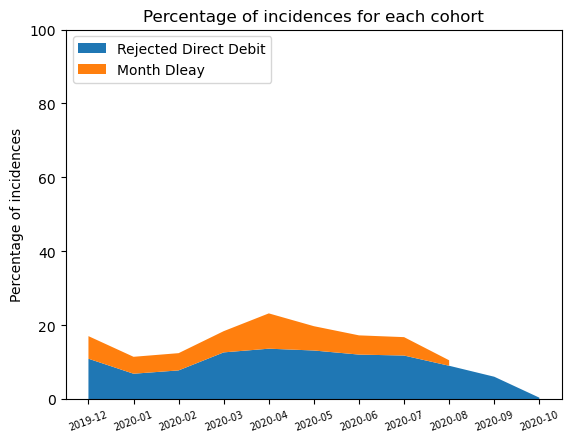

In [38]:
# Basic stacked area chart.
x=['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
             '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
             '2020-11']
plt.stackplot(x,y1,y2, labels=["Rejected Direct Debit", "Month Dleay"])
plt.ylim(0, 100)
plt.title("Percentage of incidences for each cohort")
plt.ylabel("Percentage of incidences")
plt.xticks(fontsize=7, rotation=20)
plt.legend(loc='upper left')


In [39]:
fees_by_cohort=result_df.groupby("cohort_de_verdad")["total_amount"].sum()
fees_by_cohort=fees_by_cohort.reset_index()
fees_by_cohort

,cohort_de_verdad,total_amount
0,2019-11,50.0
1,2019-12,1555.0
2,2020-01,655.0
3,2020-02,965.0
4,2020-03,870.0
5,2020-04,2565.0
6,2020-05,5930.0
7,2020-06,22495.0
8,2020-07,17175.0
9,2020-08,7095.0


In [40]:
fees_by_cohort["total_amount"]

0        50.0
1      1555.0
2       655.0
3       965.0
4       870.0
5      2565.0
6      5930.0
7     22495.0
8     17175.0
9      7095.0
10    16100.0
11    29500.0
12      335.0
Name: total_amount, dtype: float64

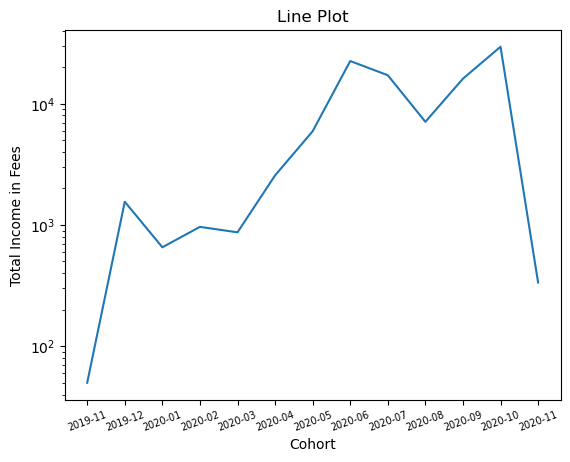

In [41]:
# Convert Period objects to strings
x_values = fees_by_cohort['cohort_de_verdad'].astype(str).values
y_values = fees_by_cohort['total_amount'].values

# Plotting the line plot
plt.plot(x_values, y_values)

# Adding labels and title
plt.xlabel('Cohort')
plt.ylabel('Total Income in Fees')
plt.title('Line Plot')
plt.xticks(fontsize=7, rotation=20)

plt.yscale('log')


# Displaying the plot
plt.show()
